In [5]:
import numpy as np
import matplotlib.pyplot as plt

def rule3(errA, errB):
    errQ = np.sqrt(errA**2+errB**2)
    return errQ

def rule4(Q, A, errA, expA, B, errB, expB):
    errQ = np.abs(Q) * np.sqrt((expA*(errA/A))**2+(expB*(errB/B))**2)
    return errQ

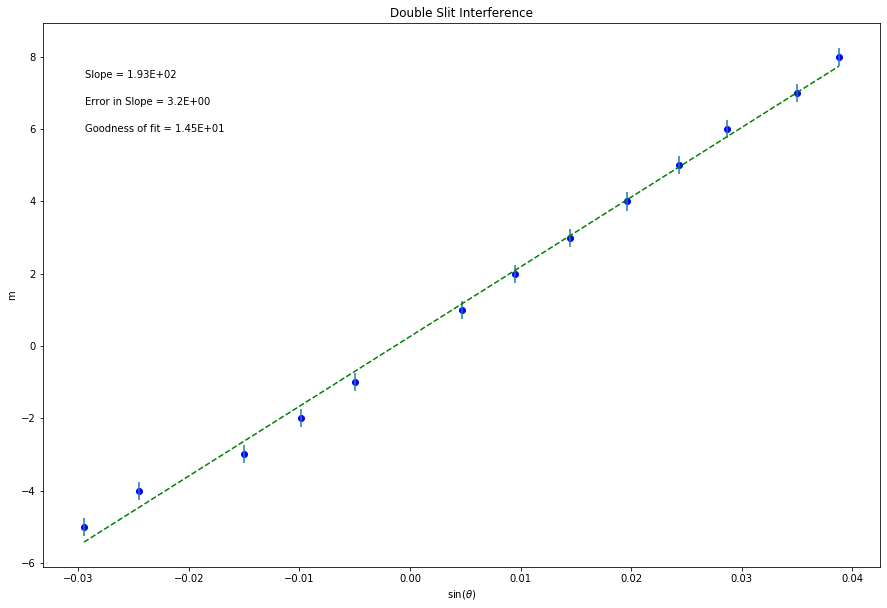

6.476683937823834e-05 cm
λ = 647.7 +/- 10.7 nm.


In [6]:
#interference

d = 0.0125 # cm
errd = 0.0
L = 600.0 # cm
errL = 2 # cm
interference = np.array([[-5   ,-4   ,-3  ,-2  ,-1  ,1  ,2  ,3  ,4   ,5   ,6   ,7   ,8   ],
                         [-17.7,-14.7,-9.0,-5.9,-3.0,2.8,5.7,8.7,11.8,14.6,17.2,21.0,23.3]]) #(m,ym(cm))
int_theta = np.arctan(interference[1]/L) #radians

xvariable_changeme = np.sin(int_theta) 
yvariable_changeme = interference[0] 

err_yvariable_changeme = np.array([0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])

x = xvariable_changeme   
y = yvariable_changeme
dy = err_yvariable_changeme  

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)


plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
plt.xlabel('$\sin(\\theta)$')
plt.ylabel('m')
plt.title('Double Slit Interference')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

slope = 193
err_slope = 3.2
wavelength = d/slope
print(wavelength,"cm")
print("λ =",np.round(wavelength*1e7,1),"+/-",np.round(rule4(wavelength,d,errd,1,slope,err_slope,1)*1e7,1),"nm.")

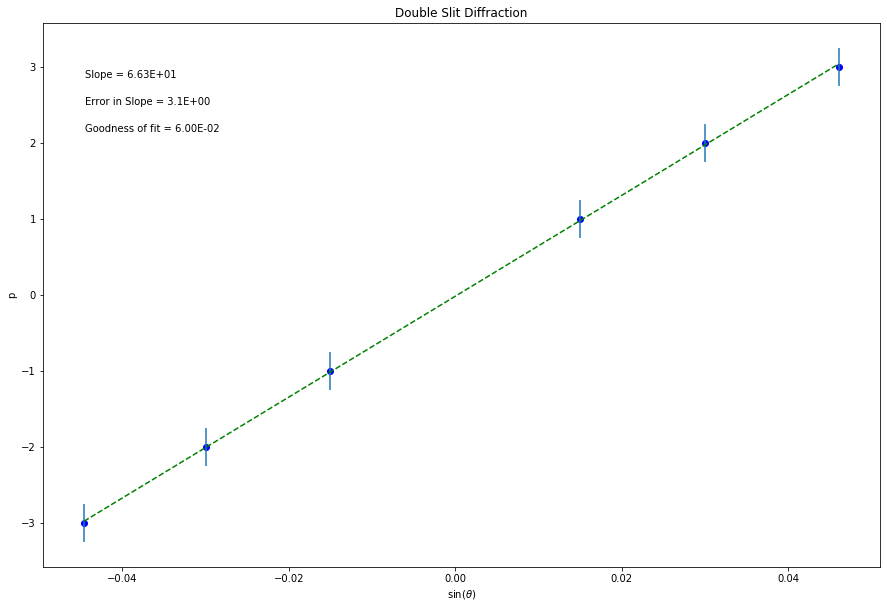

6.033182503770739e-05 cm
λ = 603.3 +/- 28.2 nm.


In [7]:
#diffraction

diffraction = np.array([[-3,-2,-1,1,2,3],[-26.8,-18.0,-9.0,9.0,18.0,27.7]]) #(p,yp)
diff_theta = np.arctan(diffraction[1]/L)
a = 0.004
erra = 0.0
L = 600.0 # cm
errL = 2 # cm

xvariable_changeme = np.sin(diff_theta) 
yvariable_changeme = diffraction[0] 

err_yvariable_changeme = np.array([0.25,0.25,0.25,0.25,0.25,0.25])


x = xvariable_changeme   
y = yvariable_changeme
dy = err_yvariable_changeme  

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('$\sin(\\theta)$')
plt.ylabel('p')
plt.title('Double Slit Diffraction')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

slope = 66.3
err_slope = 3.1
wavelength = a/slope
print(wavelength,"cm")
print("λ =",np.round(wavelength*1e7,1),"+/-",np.round(rule4(wavelength,d,errd,1,slope,err_slope,1)*1e7,1),"nm.")